In [ ]:
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations

In [ ]:
desc = pd.read_csv('/content/drive/MyDrive/data2/desc.csv',index_col=0)
desc

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
...,...,...,...,...,...,...,...
15469,4156 Sterlingview Drive,"Moorpark, CA",227,5,4.1,4092,949000
15470,4355 Avenida Prado,"Thousand Oaks, CA",372,5,3.0,2773,949900
15471,12717 Koenigstein Rd Road,"Santa Paula, CA",338,3,2.0,1576,920000


In [ ]:
desc.sort_values(by='bed', ascending=False)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
13152,221 E Oneida St,"Chula Vista, CA",80,12,3.0,2900,869500
13568,2555 Macleod Way,"Cambria, CA",60,11,11.2,6600,1550000
10728,5903 SAN MIGUEL RD.,"Bonita, CA",43,10,6.0,3926,1250000
10926,4118-22 Hamilton Street,"San Diego, CA",320,10,5.0,3554,1875000
272,2709 Villalovos Court,"Bakersfield, CA",24,10,8.0,3784,475000
...,...,...,...,...,...,...,...
11193,829 S 38th Street,"San Diego, CA",320,1,1.0,440,259900
13513,7705 Santa Cruz Road,"Atascadero, CA",21,1,1.0,600,995000
11621,350 W Ash St,"San Diego, CA",320,1,1.0,819,499500


bar asas bed satr misazim :

In [ ]:
desc.sort_values(by='bath', ascending=False)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
714,45439 Gingham Avenue,"Lancaster, CA",193,4,36.0,1229,240000
778,37809 Rudall Avenue,"Palmdale, CA",267,4,13.0,1836,299000
13568,2555 Macleod Way,"Cambria, CA",60,11,11.2,6600,1550000
7744,49275 Avenida El Nido,"La Quinta, CA",175,5,8.1,3989,795000
5142,41622 Calle Vaquero,"Temecula, CA",368,6,8.1,5883,1795000
...,...,...,...,...,...,...,...
9365,159 Velwood Drive,"Redlands, CA",304,3,0.0,1648,450000
14798,39 Margarita Avenue,"Camarillo, CA",59,2,0.0,1430,399000
14810,39 Margarita Avenue,"Camarillo, CA",59,2,0.0,1430,399000


In [ ]:
clean_desc=desc.drop([714,778],axis=0)

In [ ]:
desc.sort_values(by='sqft', ascending=False)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
8292,8531 Glendale Avenue,"Hesperia, CA",143,9,8.0,17667,1999888
8270,2510 San Antonio Crescent,"Upland, CA",381,4,5.2,11183,1999999
8252,14962 Riverside Drive,"Apple Valley, CA",15,8,5.1,9497,1700000
10952,3034 Mountain View Dr,"Escondido, CA",115,6,6.1,8897,1500000
10813,3034 Mountain View Dr,"Escondido, CA",115,6,6.1,8897,1500000
...,...,...,...,...,...,...,...
13674,1198 4th Street,"Los Osos, CA",209,1,1.0,352,439000
2037,118 Fremont Avenue,"Monterey Park, CA",225,1,1.0,352,560000
15184,6709 Breakers Way,"Ventura, CA",390,1,1.0,352,699000


In [ ]:
desc.sort_values(by='price', ascending=False)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
14720,1768 Via Aracena,"Camarillo, CA",59,5,4.1,4633,2000000
3385,26 Via Alcamo,"San Clemente, CA",319,6,6.1,5355,2000000
13551,6596 Buckley Drive,"Cambria, CA",60,4,4.1,4499,2000000
8259,29025 RED GROUSE Court,"Lake Arrowhead, CA",182,4,5.1,4617,2000000
5245,23 SANTA ROSA MOUNTAIN Lane,"Rancho Mirage, CA",300,4,3.1,3737,2000000
...,...,...,...,...,...,...,...
8336,16745 Tracy Street,"Victorville, CA",391,3,1.0,1178,195000
5489,466 Palm Vista Drive,"Palm Springs, CA",266,3,2.0,1248,195000
8450,10220 Olivine Road,"Victorville, CA",391,3,2.0,1344,195000


In [ ]:
desc.sort_values(by='bed', ascending=True)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
11220,900 N Cleveland St,"Oceanside, CA",256,1,1.0,424,294600
3805,135 Monte Vista,"San Clemente, CA",319,1,2.0,1132,577000
13513,7705 Santa Cruz Road,"Atascadero, CA",21,1,1.0,600,995000
2441,1814 W Kenneth Road,"Glendale, CA",126,1,1.0,852,699000
2439,1820 commonwealth ave,"Los Feliz, CA",208,1,1.0,728,699000
...,...,...,...,...,...,...,...
12902,9427 Los Coches Rd,"Lakeside, CA",190,10,3.0,1890,769500
10728,5903 SAN MIGUEL RD.,"Bonita, CA",43,10,6.0,3926,1250000
10926,4118-22 Hamilton Street,"San Diego, CA",320,10,5.0,3554,1875000


In [ ]:
desc.sort_values(by='bath', ascending=True)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
5686,62646 N Starcross Drive,"Desert Hot Springs, CA",101,3,0.0,2009,281000
9365,159 Velwood Drive,"Redlands, CA",304,3,0.0,1648,450000
15390,1475 Forest Drive,"Santa Paula, CA",338,3,0.0,2625,840000
14542,401 Walbridge Way,"Ojai, CA",257,5,0.0,3000,1250000
15391,1445 Forest Drive,"Santa Paula, CA",338,3,0.0,2924,825000
...,...,...,...,...,...,...,...
7744,49275 Avenida El Nido,"La Quinta, CA",175,5,8.1,3989,795000
7861,72600 Sun Valley Lane,"Palm Desert, CA",265,6,8.1,6100,889500
13568,2555 Macleod Way,"Cambria, CA",60,11,11.2,6600,1550000


In [ ]:
desc.sort_values(by='sqft', ascending=True)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
4993,72321 Bajada Trail,"Palm Desert, CA",265,3,3.0,280,1184000
15184,6709 Breakers Way,"Ventura, CA",390,1,1.0,352,699000
13674,1198 4th Street,"Los Osos, CA",209,1,1.0,352,439000
15250,6709 Breakers Way,"Ventura, CA",390,1,1.0,352,699000
2037,118 Fremont Avenue,"Monterey Park, CA",225,1,1.0,352,560000
...,...,...,...,...,...,...,...
10813,3034 Mountain View Dr,"Escondido, CA",115,6,6.1,8897,1500000
10952,3034 Mountain View Dr,"Escondido, CA",115,6,6.1,8897,1500000
8252,14962 Riverside Drive,"Apple Valley, CA",15,8,5.1,9497,1700000


In [ ]:
clean_desc=desc.drop([4993],axis=0)

In [ ]:
desc.sort_values(by='price', ascending=True)

,street,city,n_city,bed,bath,sqft,price
image_id,,,,,,,
8460,156 E Court Street,"San Bernardino, CA",318,2,1.0,585,195000
5489,466 Palm Vista Drive,"Palm Springs, CA",266,3,2.0,1248,195000
3422,1301 Skokie Road,"Seal Beach, CA",343,2,1.0,750,195000
5476,65565 Acoma Avenue,"Desert Hot Springs, CA",101,2,2.0,1313,195000
8320,32362 Sutter Road,"Lucerne Valley, CA",210,4,1.1,1381,195000
...,...,...,...,...,...,...,...
3385,26 Via Alcamo,"San Clemente, CA",319,6,6.1,5355,2000000
14,230 Gaskell Road,"Rosamond, CA",312,1,1.0,1048,2000000
14720,1768 Via Aracena,"Camarillo, CA",59,5,4.1,4633,2000000


In [ ]:
 !unzip '/content/drive/MyDrive/data2/pics.zip'

Streaming output truncated to the last 5000 lines.
  inflating: pics/5499.jpg           
  inflating: pics/55.jpg             
  inflating: pics/550.jpg            
  inflating: pics/5500.jpg           
  inflating: pics/5501.jpg           
  inflating: pics/5502.jpg           
  inflating: pics/5503.jpg           
  inflating: pics/5504.jpg           
  inflating: pics/5505.jpg           
  inflating: pics/5506.jpg           
  inflating: pics/5507.jpg           
  inflating: pics/5508.jpg           
  inflating: pics/5509.jpg           
  inflating: pics/551.jpg            
  inflating: pics/5510.jpg           
  inflating: pics/5511.jpg           
  inflating: pics/5512.jpg           
  inflating: pics/5513.jpg           
  inflating: pics/5514.jpg           
  inflating: pics/5515.jpg           
  inflating: pics/5516.jpg           
  inflating: pics/5517.jpg           
  inflating: pics/5518.jpg           
  inflating: pics/5519.jpg           
  inflating: pics/552.jpg            

In [ ]:
desc_dropped = desc.drop(['street', 'city'], axis=1)
desc_dropped

,n_city,bed,bath,sqft,price
image_id,,,,,
0,317,3,2.0,1560,201900
1,48,3,2.0,713,228500
2,152,3,1.0,800,273950
3,48,3,1.0,1082,350000
4,55,4,3.0,2547,385100
...,...,...,...,...,...
15469,227,5,4.1,4092,949000
15470,372,5,3.0,2773,949900
15471,338,3,2.0,1576,920000


In [ ]:
desc_dropped['HalfBathroom']=desc_dropped['bath'].apply(lambda x:(x%1)*10)

desc_dropped

,n_city,bed,bath,sqft,price,HalfBathroom
image_id,,,,,,
0,317,3,2.0,1560,201900,0.0
1,48,3,2.0,713,228500,0.0
2,152,3,1.0,800,273950,0.0
3,48,3,1.0,1082,350000,0.0
4,55,4,3.0,2547,385100,0.0
...,...,...,...,...,...,...
15469,227,5,4.1,4092,949000,1.0
15470,372,5,3.0,2773,949900,0.0
15471,338,3,2.0,1576,920000,0.0


In [ ]:
desc_dropped['bath']=desc_dropped['bath'].apply(lambda x:int(x))

desc_dropped

,n_city,bed,bath,sqft,price,HalfBathroom
image_id,,,,,,
0,317,3,2,1560,201900,0.0
1,48,3,2,713,228500,0.0
2,152,3,1,800,273950,0.0
3,48,3,1,1082,350000,0.0
4,55,4,3,2547,385100,0.0
...,...,...,...,...,...,...
15469,227,5,4,4092,949000,1.0
15470,372,5,3,2773,949900,0.0
15471,338,3,2,1576,920000,0.0


In [ ]:
'''X = desc.drop('price',axis =1).values
y = desc['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)'''

"X = desc.drop('price',axis =1).values\ny = desc['price'].values\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
desc_scaled = scaler.fit_transform(desc_dropped)
desc_scaled = pd.DataFrame(desc_scaled, columns = desc_dropped.columns.tolist())
desc_scaled


,n_city,bed,bath,sqft,price,HalfBathroom
0,0.765700,0.181818,0.055556,0.073618,0.003823,0.00
1,0.115942,0.181818,0.055556,0.024904,0.018560,0.00
2,0.367150,0.181818,0.027778,0.029907,0.043740,0.00
3,0.115942,0.181818,0.027778,0.046126,0.085873,0.00
4,0.132850,0.272727,0.083333,0.130385,0.105319,0.00
...,...,...,...,...,...,...
15469,0.548309,0.363636,0.111111,0.219244,0.417729,0.25
15470,0.898551,0.363636,0.083333,0.143383,0.418227,0.00
15471,0.816425,0.181818,0.055556,0.074538,0.401662,0.00
15472,0.611111,0.272727,0.055556,0.103871,0.444321,0.00


In [ ]:
import os
import cv2

cnt=0

pics = np.zeros((15474,64,64,3),dtype='uint32')
for i in range(15474):

    sample=cv2.imread('/content/pics/' + str(i) + '.jpg')
    imgs=cv2.resize(sample,(64,64))
    imgs=imgs.astype('float32')
    pics[cnt] = imgs
    cnt+=1

print("No. of images: ",cnt)

No. of images:  15474


In [ ]:
pics=pics/255.0
pics


array([[[[0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ]],

        [[0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ]],

        [[0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ]],

        ...,

        [[0.95294118, 0.96470588, 0.96862745],
         [0.9372549 , 0.94509804, 0.94901961]

In [ ]:
from sklearn.model_selection import train_test_split
split = train_test_split(desc_scaled, pics , test_size=0.25)
(X_train,X_test,X_pics_train,X_pics_test) = split

y_train , y_test = X_train['price'].values , X_test['price'].values

X1_train=X_train[['n_city','bed','bath','HalfBathroom','sqft']].values
X2_train=X_pics_train
X1_test=X_test[['n_city','bed','bath','HalfBathroom','sqft']].values
X2_test=X_pics_test


print(X1_train.shape)
print(X1_test.shape)
print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)

(11605, 5)
(3869, 5)
(11605, 64, 64, 3)
(3869, 64, 64, 3)
(11605,)
(3869,)


In [ ]:
input_f1 = Input((X_train.shape[1]),name='input1_layer')


fully1 = Dense(8 ,activation='relu' , name="layer1")(input_f1)
fuuly1 = Dense(4 ,activation='relu' , name="layer2")(fully1)
fully1 = Dense(1 ,activation='linear' , name="layer3")(fully1)
fully = Model(inputs=[input_f1] , outputs=[fully1])
fully.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1_layer (InputLayer)    [(None, 6)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 8)                 56        
_________________________________________________________________
layer3 (Dense)               (None, 1)                 9         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fully.compile(optimizer='sgd', loss='mse')

In [ ]:
history = fully.fit(x=X_train,y=y_train,batch_size = 128 ,epochs= 20,validation_split = 0.25)

Epoch 1/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.0430
Epoch 2/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0452 - val_loss: 0.0423
Epoch 3/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0444 - val_loss: 0.0416
Epoch 4/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0436 - val_loss: 0.0409
Epoch 5/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0428 - val_loss: 0.0403
Epoch 6/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.0396
Epoch 7/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0413 - val_loss: 0.0388
Epoch 8/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0404 - val_loss: 0.0380
Epoch 9/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0395 - val_loss: 0.0372
Epoch 10/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.0363
Epoch 11/20
68/68 [

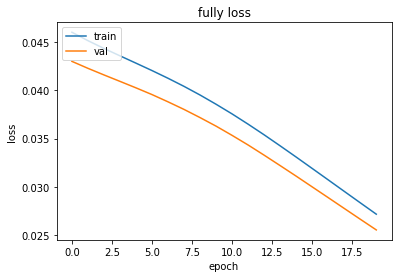

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('fully loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
input_conv1 = Input((X_pics_train.shape[1],X_pics_train.shape[2],X_pics_train.shape[3]),name = 'input2_layer')
conv1 = Conv2D(16,(3,3), activation='relu',name = 'Conv1_1_5')(input_conv1)
conv1 = BatchNormalization(name = 'Bnorm1_1')(conv1)

conv1 = Conv2D(32,(3,3), activation='relu', padding='same',name= 'Conv1_2_5')(conv1)
conv1 = BatchNormalization(name = 'Bnorm1_2')(conv1)
conv1 = MaxPooling2D((2, 2),name = 'MaxPool1')(conv1)

conv1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv1_3_3')(conv1)
conv1 = BatchNormalization(name = 'Bnorm1_3')(conv1)

conv1 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv1_4_3')(conv1)
conv1 = BatchNormalization(name = 'Bnorm1_4')(conv1)
conv1 = MaxPooling2D((2, 2),name = 'MaxPool2')(conv1)

conv1 = Flatten(name = 'Flatten1')(conv1)
conv1=Dense(32,activation='relu')(conv1)
conv1=Dense(8,activation='relu')(conv1)
conv1=Dense(4,activation='relu')(conv1)
convv=Dense(1,activation='linear')(conv1)



conv1=Dense(16,activation='relu')(conv1)
conv = Model(inputs= [input_conv1], outputs=[convv])
conv.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2_layer (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
Conv1_1_5 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
Bnorm1_1 (BatchNormalization (None, 62, 62, 16)        64        
_________________________________________________________________
Conv1_2_5 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
Bnorm1_2 (BatchNormalization (None, 62, 62, 32)        128       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 31, 31, 32)        0         
_________________________________________________________________
Conv1_3_3 (Conv2D)           (None, 31, 31, 64)        1849

In [ ]:
conv.compile(optimizer='sgd', loss='mse')

In [ ]:
history = conv.fit(x =X_pics_train, y = y_train,batch_size = 128 ,epochs= 20,validation_split = 0.25)

Epoch 1/20
68/68 [==============================] - 149s 2s/step - loss: 0.0664 - val_loss: 0.0630
Epoch 2/20
68/68 [==============================] - 149s 2s/step - loss: 0.0427 - val_loss: 0.0610
Epoch 3/20
68/68 [==============================] - 147s 2s/step - loss: 0.0412 - val_loss: 0.0631
Epoch 4/20
68/68 [==============================] - 148s 2s/step - loss: 0.0396 - val_loss: 0.0836
Epoch 5/20
68/68 [==============================] - 148s 2s/step - loss: 0.0368 - val_loss: 0.0688
Epoch 6/20
68/68 [==============================] - 149s 2s/step - loss: 0.0363 - val_loss: 0.0580
Epoch 7/20
68/68 [==============================] - 147s 2s/step - loss: 0.0353 - val_loss: 0.0493
Epoch 8/20
68/68 [==============================] - 147s 2s/step - loss: 0.0337 - val_loss: 0.0437
Epoch 9/20
68/68 [==============================] - 148s 2s/step - loss: 0.0337 - val_loss: 0.0423
Epoch 10/20
68/68 [==============================] - 147s 2s/step - loss: 0.0337 - val_loss: 0.0399
Epoch 11/

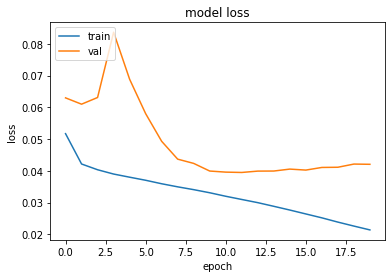

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
input_model1 = Input((X_train.shape[1]),name='input1_layer')
input_model2 = Input((X_pics_train.shape[1],X_pics_train.shape[2],X_pics_train.shape[3]),name = 'input2_layer')


model1 = Dense(8 ,activation='relu' , name="layer1")(input_model1)
model1 = Dense(4 ,activation='relu' , name="layer2")(model1)
model1 = Dense(2 ,activation='relu' , name="layer3")(model1)
#droupout_layer = Dropout(0.2)(model1)

########################################################


model2 = Conv2D(16,(3,3), activation='relu',name = 'Conv1_1_5')(input_model2)
model2 = BatchNormalization(name = 'Bnorm1_1')(model2)
model2 = Conv2D(32,(3,3), activation='relu', padding='same',name= 'Conv1_2_5')(model2)
model2 = BatchNormalization(name = 'Bnorm1_2')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool1')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv1_3_3')(model2)
model2 = BatchNormalization(name = 'Bnorm1_3')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv1_4_3')(model2)
model2 = BatchNormalization(name = 'Bnorm1_4')(model2)
model2 = AveragePooling2D((2, 2),name = 'AvgPool1_1')(model2)

'''model2 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv1_5_1')(model2)
model2 = BatchNormalization(name = 'Bnorm1_5')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool1_2')(model2)'''
model2 = Flatten(name = 'Flatten1')(model2)

model2=Dense(16,activation='relu')(model2)
##############################################################

merged = Concatenate()([model1, model2])
# neural network
merged = Dense(units = 20 , activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 15 , activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 10, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
output = Dense(units = 1, activation = 'linear')(merged)

model = Model(inputs= [input_model1,input_model2], outputs=[output])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input2_layer (InputLayer)       [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_1_5 (Conv2D)              (None, 62, 62, 16)   448         input2_layer[0][0]               
__________________________________________________________________________________________________
Bnorm1_1 (BatchNormalization)   (None, 62, 62, 16)   64          Conv1_1_5[0][0]                  
__________________________________________________________________________________________________
Conv1_2_5 (Conv2D)              (None, 62, 62, 32)   4640        Bnorm1_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
import tensorflow as tf

rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='MAE',
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
#history = model.fit(x=([X1_train,X2_train],y=y_train),epochs=10, batch_size=128)
import tensorflow as tf

tf.config.run_functions_eagerly(True)
history = model.fit(x = [X_train,X_pics_train], y = y_train,batch_size = 128 ,epochs= 20,validation_split = 0.25)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/20
68/68 [==============================] - ETA: 0s - loss: 0.6325 - accuracy: 6.4229e-04

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


68/68 [==============================] - 173s 3s/step - loss: 0.6298 - accuracy: 6.4631e-04 - val_loss: 0.1779 - val_accuracy: 0.0010
Epoch 2/20
68/68 [==============================] - 173s 3s/step - loss: 0.2193 - accuracy: 0.0012 - val_loss: 0.1702 - val_accuracy: 0.0010
Epoch 3/20
68/68 [==============================] - 170s 3s/step - loss: 0.1806 - accuracy: 8.6278e-04 - val_loss: 0.1589 - val_accuracy: 0.0010
Epoch 4/20
68/68 [==============================] - 170s 3s/step - loss: 0.1676 - accuracy: 6.0499e-04 - val_loss: 0.1583 - val_accuracy: 0.0010
Epoch 5/20
68/68 [==============================] - 171s 3s/step - loss: 0.1628 - accuracy: 7.7620e-04 - val_loss: 0.1516 - val_accuracy: 0.0010
Epoch 6/20
68/68 [==============================] - 171s 3s/step - loss: 0.1580 - accuracy: 8.2911e-04 - val_loss: 0.1533 - val_accuracy: 0.0010
Epoch 7/20
68/68 [==============================] - 170s 2s/step - loss: 0.1507 - accuracy: 5.4100e-04 - val_loss: 0.1507 - val_accuracy: 0.0010


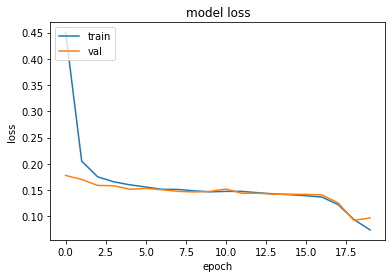

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/W2_2/house.hdf5')
model.save('/content/drive/MyDrive/W2_2/house.hdf5')